HARDCODED FORCE IMPLECATION FROM ONE DIRECTION 

<Axes3D: >

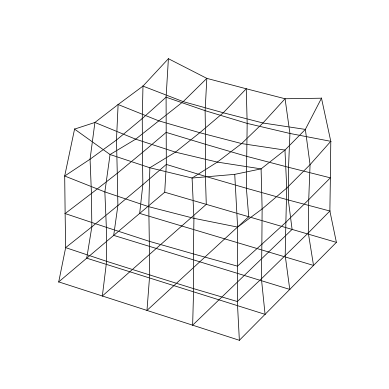

In [32]:
## HARDCODED FORCE IMPLECATION FROM ONE DIRECTION ##

import numpy as np
from skfem import *
from skfem.models.elasticity import (linear_elasticity, lame_parameters, linear_stress)
from skfem.helpers import dot, sym_grad
from skfem.visuals.matplotlib import draw
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Initialisieren des Netzes und der Elemente
m = MeshHex().refined(2)
e1 = ElementHex1()
e = ElementVector(e1)
ib = Basis(m, e, MappingIsoparametric(m, e1), 3)

# Materialparameter
young_modulus = 31.1e9
nu = 0.35

# assemblierung stiffness matrix
K = asm(linear_elasticity(*lame_parameters(young_modulus, nu)), ib)

# label dofs
dofs = {
    'left': ib.get_dofs(lambda x: x[0] == 0.0),
    'right': ib.get_dofs(lambda x: x[0] == 1.0),
    'up': ib.get_dofs(lambda x: x[2] == 1.0),
    'down': ib.get_dofs(lambda x: x[2] == 0.0),
    'front': ib.get_dofs(lambda x: x[1] == 0.0),
    'back': ib.get_dofs(lambda x: x[1] == 1.0)
}

u = ib.zeros()

# force applied to knots
Kraft = 50000000  
F = np.zeros(u.shape)
up_dofs = dofs['up'].nodal['u^3']
F[up_dofs] = Kraft

# Randbedingungen fixieren
fixed_dofs = np.hstack([dofs['down'].all()])
u[fixed_dofs] = 0

#set dofs and solve DGL
free_dofs = np.setdiff1d(np.arange(K.shape[0]), fixed_dofs)
K_free = K[free_dofs][:, free_dofs]
F_free = F[free_dofs]
u_free = solve(K_free, F_free)
u[free_dofs] = u_free

# calculating upper shift only for the hard coded example
verschiebung_oben = u[up_dofs]


# implement shifts
u[up_dofs] = verschiebung_oben


I = ib.complement_dofs(np.concatenate((dofs['up'], dofs['down'])))
u = solve(*condense(K, x=u, I=I))


factor = 5
m_defo = m.translated(factor * u[ib.nodal_dofs])
draw(m_defo)

CONNECTION FORCE AND ANY MESH 




[6.03490358 5.9505352  6.3080291  6.04611182 6.50686789 6.18254015
 6.71670047 6.34760365 6.9089433  6.55041317 6.99611828 6.71235625
 6.8870936  6.97386779 5.8951275  6.24263238 5.49630673 6.75711767
 5.77062138 6.69632701 5.74807353 6.50473824 7.40214332 5.99163714
 7.28212787 7.33093091 5.82912437 5.83762614 7.32924129 5.55041946
 7.18176536 5.61229494 6.38556048 5.67384888 6.87812496 6.10411963
 6.97327672 5.84403012 6.1195552  5.86349348]


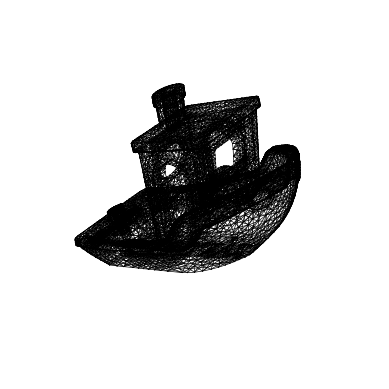

In [48]:
import numpy as np
from skfem import *
from skfem.models.elasticity import linear_elasticity, lame_parameters
from skfem.visuals.matplotlib import draw


m = MeshTet()
m = m.load("C:/Users/AlexP/Desktop/BA/Meshes/Benchy.msh")

e1 = ElementTetP1() # ElementHex1() # ElementTetP1()
e = ElementVector(e1)
ib = Basis(m, e, MappingIsoparametric(m, e1), 3)

young_modulus = 31.1e9
nu = 0.35

K = asm(linear_elasticity(*lame_parameters(young_modulus,nu)), ib)



dofs = {
    'left': ib.get_dofs(lambda x: np.isclose(x[0], x[0].min())),
    'right': ib.get_dofs(lambda x: np.isclose(x[0], x[0].max())),
    'up': ib.get_dofs(lambda x: np.isclose(x[2], x[2].max())),
    'down': ib.get_dofs(lambda x: np.isclose(x[2], x[2].min())),
    'front': ib.get_dofs(lambda x: np.isclose(x[1], x[1].max())),
    'back': ib.get_dofs(lambda x: np.isclose(x[1], x[1].min()))
    }

u = ib.zeros()
Kraft = 50000000  
F = np.zeros(u.shape)
up_dofs = dofs['up'].nodal['u^3']
F[up_dofs] = Kraft

# Randbedingungen fixieren
fixed_dofs = np.hstack([dofs['down'].all()])
u[fixed_dofs] = 0

#set dofs and solve DGL
free_dofs = np.setdiff1d(np.arange(K.shape[0]), fixed_dofs)
K_free = K[free_dofs][:, free_dofs]
F_free = F[free_dofs]
u_free = solve(K_free, F_free)
u[free_dofs] = u_free

# calculating upper shift only for the hard coded example
verschiebung_oben = u[up_dofs]


# implement shifts
u[up_dofs] = verschiebung_oben




I = ib.complement_dofs(np.concatenate((dofs['up'], dofs['down'])))

u = solve(*condense(K, x=u, I=I))

sf = 1.0
m = m.translated(sf * u[ib.nodal_dofs])
draw(m)
print(u[up_dofs])

In [1]:
import numpy as np
from skfem import *
from skfem.models.elasticity import linear_elasticity, lame_parameters
from skfem.visuals.matplotlib import draw


m = MeshTet()
m = m.load("C:/Users/AlexP/Desktop/BA/Meshes/Benchy.msh")

e1 = ElementTetP1() # ElementHex1() # ElementTetP1()
e = ElementVector(e1)
ib = Basis(m, e, MappingIsoparametric(m, e1), 3)

young_modulus = 31.1e9
nu = 0.35

K = asm(linear_elasticity(*lame_parameters(young_modulus,nu)), ib)



dofs = {
    'left': ib.get_dofs(lambda x: np.isclose(x[0], x[0].min())),
    'right': ib.get_dofs(lambda x: np.isclose(x[0], x[0].max())),
    'up': ib.get_dofs(lambda x: np.isclose(x[2], x[2].min())),
    'down': ib.get_dofs(lambda x: np.isclose(x[2], x[2].max())),
    'front': ib.get_dofs(lambda x: np.isclose(x[1], x[1].min())),
    'back': ib.get_dofs(lambda x: np.isclose(x[1], x[1].max()))
    }

u = ib.zeros()
u[dofs['right'].nodal['u^1']] = -1

I = ib.complement_dofs(dofs)

u = solve(*condense(K, x=u, I=I))

sf = 10.0
m = m.translated(sf * u[ib.nodal_dofs])
m.save("C:/Users/AlexP/Desktop/BA/Meshes/output_" + '.vtk', {"affected": u[ib.nodal_dofs][0]})


KeyboardInterrupt: 